In [1]:
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [4]:
nyc.Date = nyc.Date.floordiv(100)

In [5]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [8]:
X_train.shape

(93, 1)

In [9]:
X_test.shape

(31, 1)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_regression = LinearRegression()

In [12]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [13]:
linear_regression.coef_

array([0.01939167])

In [14]:
linear_regression.intercept_

-0.30779820252656265

In [15]:
predicted = linear_regression.predict(X_test)

In [16]:
expected = y_test

In [17]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [18]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)

In [19]:
predict(2019)

array([38.84399018])

In [20]:
predict(1890)

array([36.34246432])

In [21]:
import seaborn as sns

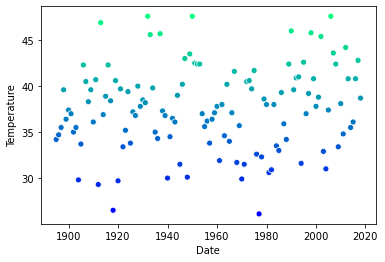

In [22]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

In [23]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [24]:
import numpy as np

In [25]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [26]:
y = predict(x)

In [27]:
import matplotlib.pyplot as plt

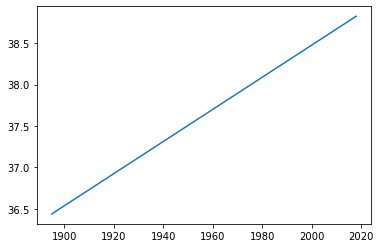

In [28]:
line = plt.plot(x, y)

In [29]:
predict(1889)

array([36.32307265])

In [30]:
predict(2100)

array([40.41471572])

In [31]:
#IvanQuackenbush